In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#To display images in the notebook itself
%matplotlib inline
from IPython.display import Image

In [3]:
Image(filename="checkerboard_18x18.png")

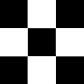

In [4]:
Image(filename='checkerboard_84x84.jpg')

# cv2.imread
used to read images into a numpy array

## Syntax
test = cv2.imread("relative or absolute file path", flag)

here, the flag can be 0, 1, -1
where
    0 - grayscale
    1 - color
   -1 - alpha channel
   

In [5]:
cb_img = cv2.imread("checkerboard_18x18.png", 0)

In [6]:
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

## We can use various numpy methods to get info about the image.

In [7]:
cb_img.shape

(18, 18)

In [8]:
cb_img.dtype

dtype('uint8')

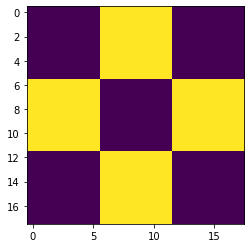

In [9]:
# Using matplotlib's imshow to print the numpy array as an image.
plt.imshow(cb_img)

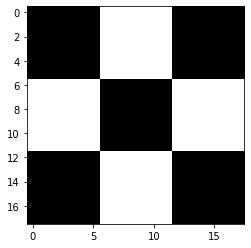

In [10]:
plt.imshow(cb_img, cmap='gray')

In [14]:
cb_fuzzy_img = cv2.imread('checkerboard_fuzzy_18x18.jpg',0)
print(cb_fuzzy_img)

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

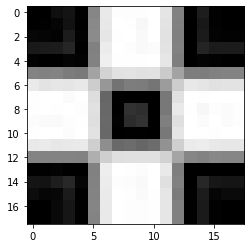

In [15]:
plt.imshow(cb_fuzzy_img, cmap = 'gray')

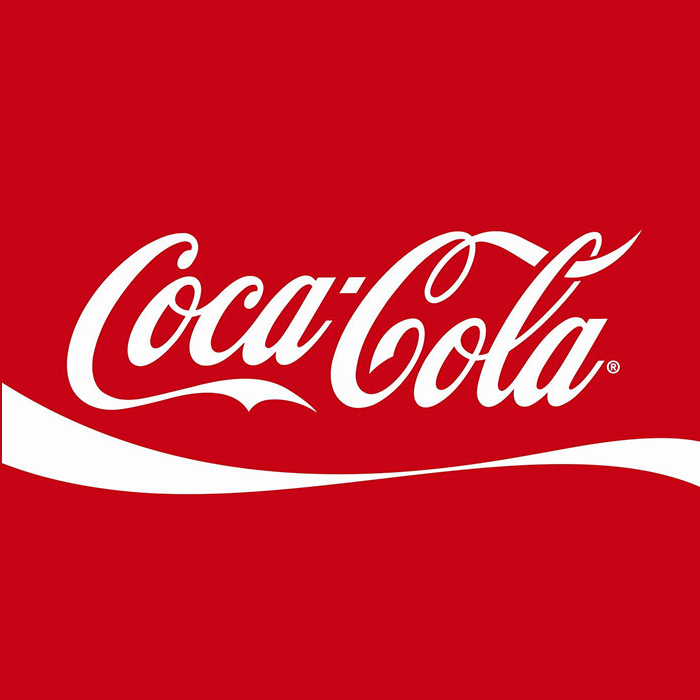

In [16]:
Image('coca-cola-logo.png')

In [21]:
coke_img = cv2.imread('coca-cola-logo.png', 1) # the one indicates that we are reading this as a color image.
print(coke_img.shape)

(700, 700, 3)


the three indicates the number of channels, 3 in this case - RGB

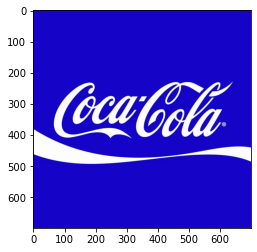

In [22]:
plt.imshow(coke_img)

The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.

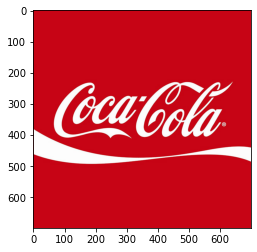

In [23]:
coke_channel_reversed = coke_img[:, :, ::-1] # Reverses the channels
plt.imshow(coke_channel_reversed)

# Splitting and merging channels
cv2.split() Divides a multi-channel array into several single-channel arrays.

cv2.merge() Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

## OpenCV Documentation
https://docs.opencv.org/4.5.1/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a

In [27]:
NewZ_img = cv2.imread('New_Zealand_Lake.jpg',1)
b,g,r = cv2.split(NewZ_img)

Text(0.5, 1.0, 'merged')

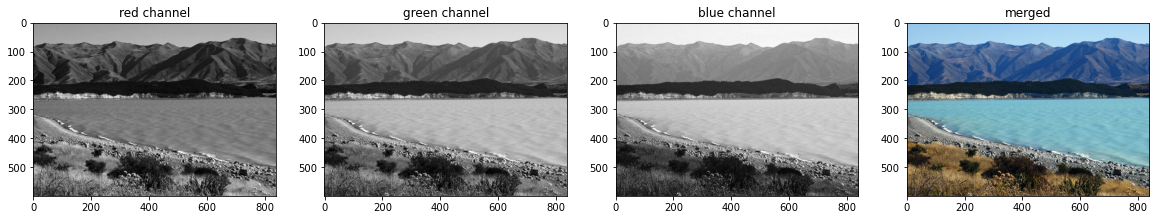

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(141); plt.imshow(r, cmap='gray'); plt.title("red channel")
plt.subplot(142); plt.imshow(g, cmap='gray'); plt.title("green channel")
plt.subplot(143); plt.imshow(b, cmap='gray'); plt.title("blue channel")

img_merged = cv2.merge((b,g,r))
plt.subplot(144); plt.imshow(img_merged[:,:, ::-1]); plt.title('merged')

## Converting to different Color Spaces


**`cv2.cvtColor()`** Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv2.cvtColor( src, code )
```

`dst`: Is the output image of the same size and depth as `src`.

The function has **2 required arguments**:

1. `src` input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.
2. `code` color space conversion code (see ColorConversionCodes). 

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`cv2.cvtColor:`** https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab
**`ColorConversionCodes:`** https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0

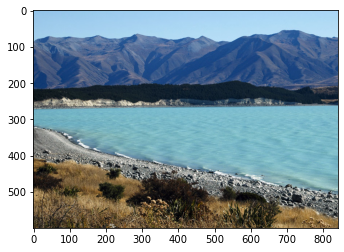

In [32]:
img_bgr = cv2.imread('New_Zealand_Lake.jpg', 1)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

We can also change one particular parameter of the image say b and then merge it to get a different image.

In [35]:
b = b+10
img_merge_new = cv2.merge((b, g, r))
img_rgb_new = cv2.cvtColor(img_merge_new, cv2.COLOR_BGR2RGB)

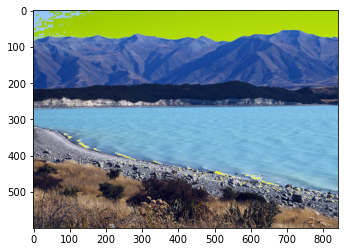

In [36]:
plt.imshow(img_rgb_new)